# Machine Learning dengan Menggunakan KNN

Untuk projek kali ini, dataset yang akan digunakan adalah Titanic Dataset, dimana yang akan diprediksi adalah apakah seseorang akan selamat (1) atau tidak (0)

## Mengimport libraries yang dibutuhkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Mengimport dataset Titanic.csv

# Import Data

In [3]:
from google.colab import files 
import pandas as pd 
import io 


uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [18]:
df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']), index_col="PassengerId") 

Melihat 5 data teratas

In [19]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Kita perlu mengetahui terlebih dahulu, seberapa besar persebaran dari data point kita. Hasil didapatkan bahwa terdapat 549 penumpang tidak selamat (0), dan 342 (selamat)

### Missing Values

In [21]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Dari informasi diatas, terdapat banyak missing value pada kolom Cabin. Pada kasus ini, jika missing value yang ada terlalu banyak, maka langkah yang tepat adalah dengan menghapus tabel tersebut.

Untuk kolom Age dan Cabin, kita bisa menggunakan metode imputasi.


*   median untuk tipe data numerik
*   most_frequent (mengisi missing value, dengan data yang paling sering muncul) untuk tipe data kategorik



### drop kolom cabin

In [22]:
df.drop(columns="Cabin", inplace=True)
df.shape

(891, 10)

### drop kolom Ticket
menghapus kolom Ticket dilakukan karena kolom tersebut tidak relevan dengan selamat atau tidaknya seseorang dalam Titanic ini

In [23]:
df.drop(columns="Ticket", inplace=True)
df.shape

(891, 9)

Kita tidak melakukan data cleaning diawal (sebelum preprocessing) untuk menghindari *data leakage*

## EDA (Exploratory Data Analysis)

Age vs Survived

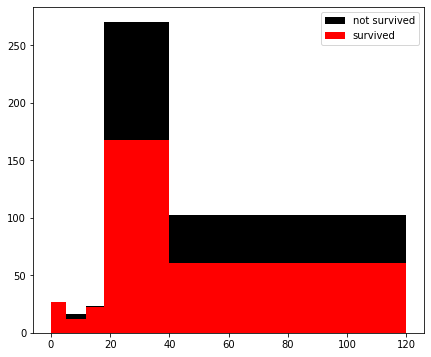

In [25]:
plt.figure(figsize=(7,6))
plt.hist(df["Age"][df["Survived"] == 0], bins= [0, 5, 12, 18, 40, 120], color="black", label="not survived")
plt.hist(df["Age"][df["Survived"] == 1], bins= [0, 5, 12, 18, 40, 120], color="red", label="survived")
plt.legend();

Sebagian besar dari penumpang yang tidak selamat adalah penumpang yang berumur antara 20-40 tahun

Fare vs Survived

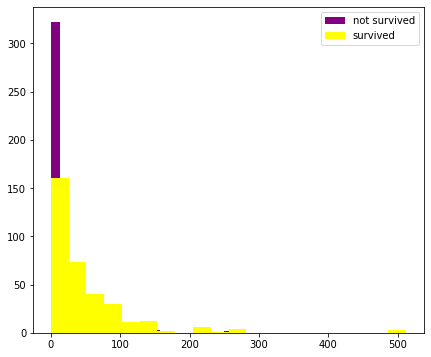

In [26]:
plt.figure(figsize=(7,6))
plt.hist(df["Fare"][df["Survived"] == 0], bins= 20, color="purple", label="not survived")
plt.hist(df["Fare"][df["Survived"] == 1], bins= 20, color="yellow", label="survived")
plt.legend();

Mayoritas penumpang yang tidak selamat, adalah penumpang yang membeli tiket dibawah 40 dollar

Tipe data Ordinal / Kardinal vs Target (Survived)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

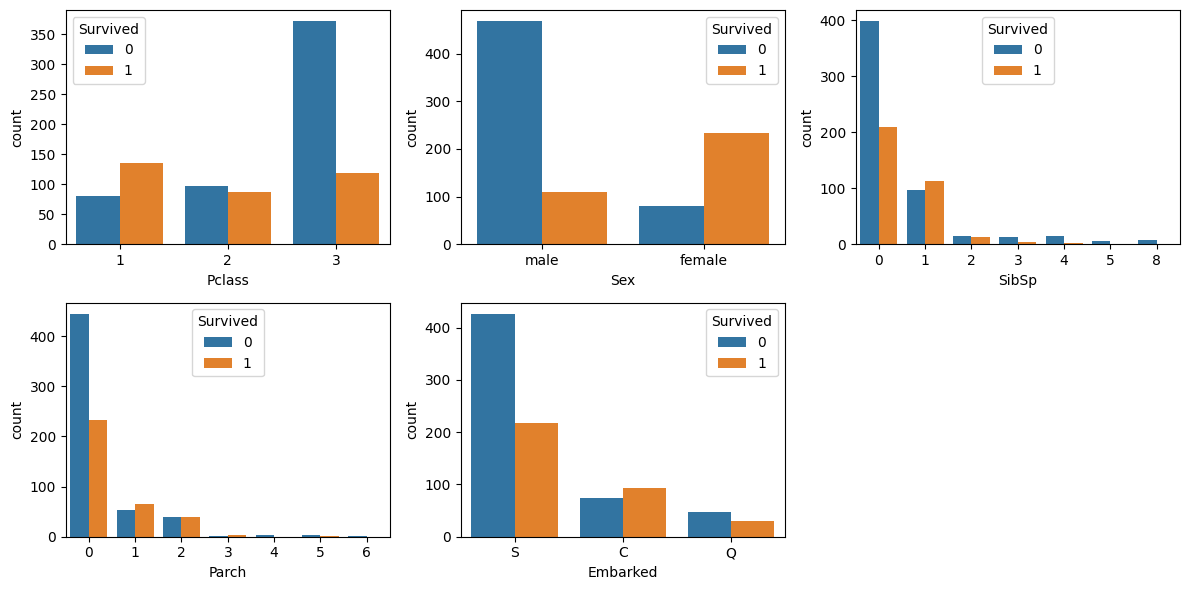

In [27]:
plt.figure(figsize=(12,6),dpi=100)

plt.subplot(231)
sns.countplot("Pclass", data=df, hue="Survived")

plt.subplot(232)
sns.countplot("Sex", data=df, hue="Survived")

plt.subplot(233)
sns.countplot("SibSp", data=df, hue="Survived")

plt.subplot(234)
sns.countplot("Parch", data=df, hue="Survived")

plt.subplot(235)
sns.countplot("Embarked", data=df, hue="Survived")

plt.tight_layout()
plt.show();

Kolom Pclass

*   Kebanyakan dari penumpang yang tidak selamat berasal dari Class 3


Kolom Sex

*   Kebanyakan dari penumpang yang tidak selamat adalah laki- laki, sedangkan sebaliknya, perempuan mendominasi untuk yang selamat


Kolom SibSp

*   Penumpang yang tidak memeliki pasangan, dan saudara (berpergian sendirian) cenderung tidak selamat


Kolom Pclass

*   Penumpang yang tidak memeliki/bersama orang tua, anak - anaknya(berpergian sendirian) cenderung tidak selamat


Kolom Pclass
*   Kebanyakan dari penumpang yang tidak selamat, memiliki kota tujuan adalah Southampton




## Feature Engineering

isAlone = kolom untuk mendata penumpang yang berangkat sendirian
Age = kolom akan di-binning ke dalam kategori Balita, Anak - Anak, Remaja, Dewasa, dan Lansia
Fare = kolom akan di-binning ke dalam kategori Murah, Mahal, Eksekutif

In [32]:
df["isAlone"] =  (df["SibSp"] == 0) & (df["Parch"]==0) 
df["Age"] = pd.cut(df["Age"], [0,5,12,18,40,120], labels = ["Balita", "Anak-anak", "Remaja", "Dewasa", "Lansia"])
df["Fare"] = pd.cut(df["Fare"], [0, 25, 100, 600], labels=["Murah", "Mahal", "Eksekutif"])

In [33]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,Dewasa,1,0,Murah,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Dewasa,1,0,Mahal,C,False
3,1,3,"Heikkinen, Miss. Laina",female,Dewasa,0,0,Murah,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Dewasa,1,0,Mahal,S,False
5,0,3,"Allen, Mr. William Henry",male,Dewasa,0,0,Murah,S,True


Selanjutnya, kolom Name akan di-binning. Konsep nya adalah dengan memisahkan gelar dari penumpang

In [34]:
def pemisah(x):
 title = x.split(", ")[1].split(".")[0]
 return title

df["title"] = df["Name"].apply(pemisah)

df.drop(columns=["Name"], inplace=True)

In [35]:
df.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Ms                1
Capt              1
Lady              1
Jonkheer          1
Sir               1
Don               1
the Countess      1
Name: title, dtype: int64

Karena gelar yang ada disini terlalu banyak, maka akan diambil 4 gelar terbanyak yaitu Mr, Miss, Mrs, dan Master

In [36]:
gelar = ["Mr", "Miss", "Mrs", "Master"]

def top_4title(x) :
  if x in ["Mr", "Miss", "Mrs", "Master"]:
    return x
  else:
    return "other"

df["title"] = df["title"].apply(top_4title)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone,title
PassengerId,,,,,,,,,,
1,0,3,male,Dewasa,1,0,Murah,S,False,Mr
2,1,1,female,Dewasa,1,0,Mahal,C,False,Mrs
3,1,3,female,Dewasa,0,0,Murah,S,True,Miss
4,1,1,female,Dewasa,1,0,Mahal,S,False,Mrs
5,0,3,male,Dewasa,0,0,Murah,S,True,Mr


## Dataset Spliting

In [17]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(columns="Survived")
y = df["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

Disini yang akan menjadi kolom target adalah Survived

## Preprocessing



Libraries yang dipakai untuk preprocessing

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

Seperti yang tadi telah dijelaskan bahwa preprocessing dilakukan setelah tahap spliting, agar menghindari data leakage

In [40]:
preprocessing = ColumnTransformer([
    ("numeric", num_pipe(scaling="minmax"), ["SibSp", "Parch"]),
    ("categoric", cat_pipe(encoder="onehot"), ["Pclass", "Sex", "Age", "Fare", "Embarked", "isAlone", "title"])
])

Algoritma yang digunakan untuk prediksi adalah KNN (K nearest neighbors)

In [43]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ("prep", preprocessing),
    ("algo", KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   12.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                        

In [45]:
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

{'algo__n_neighbors': 11, 'algo__p': 1.5, 'algo__weights': 'uniform'}
0.8455056179775281 0.8216619981325864 0.8044692737430168


## Confusion Matrix

In [48]:
from jcopml.plot import plot_confusion_matrix

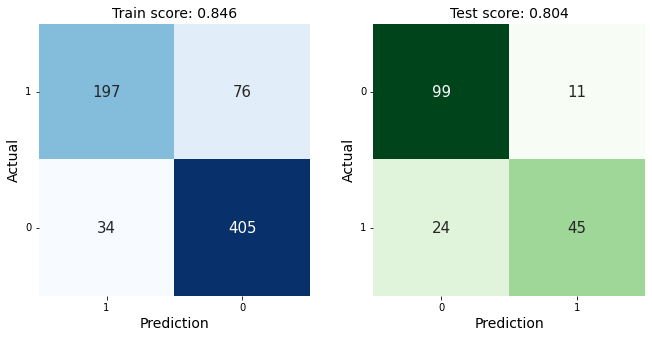

In [49]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

Model ini dapat meprediksi dengan benar TP sebanyak 99 data, dan TF sebanyak 45 data